# Convolution practice

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from matplotlib import cm
from tqdm.auto import tqdm
from PIL import Image

warnings.filterwarnings('ignore') 

In [14]:
! wget https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg

--2025-04-16 16:31:27--  https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 73801 (72K) [image/jpeg]
Сохранение в: «butterfly.jpg»

butterfly.jpg       100%[===================>]  72,07K  --.-KB/s    за 0,06s   

2025-04-16 16:31:27 (1,15 MB/s) - «butterfly.jpg» сохранён [73801/73801]



Image format: JPEG, shape: (640, 427), color scheme: RGB


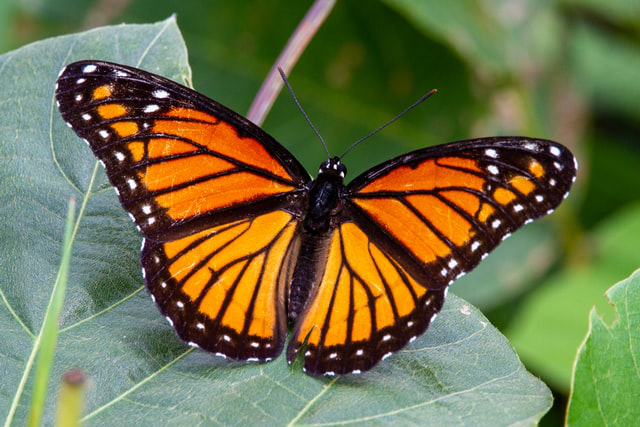

In [15]:
img = Image.open('/Users/crissyro/Deep-learning-courses/notebooks/butterfly.jpg')

print(f'Image format: {img.format}, shape: {img.size}, color scheme: {img.mode}')

img

In [17]:
img_matrix = np.array(img)
img_matrix

array([[[101, 153, 107],
        [101, 153, 107],
        [101, 153, 107],
        ...,
        [114, 146,  99],
        [112, 144,  97],
        [110, 142,  95]],

       [[101, 153, 107],
        [101, 153, 107],
        [101, 153, 107],
        ...,
        [114, 146,  99],
        [111, 143,  96],
        [110, 142,  95]],

       [[101, 153, 107],
        [101, 153, 107],
        [100, 152, 106],
        ...,
        [113, 145,  98],
        [111, 143,  96],
        [109, 141,  94]],

       ...,

       [[135, 167, 166],
        [144, 179, 175],
        [132, 169, 161],
        ...,
        [102, 168,  70],
        [ 97, 162,  62],
        [ 99, 164,  62]],

       [[133, 165, 164],
        [142, 177, 171],
        [137, 173, 163],
        ...,
        [100, 166,  68],
        [ 94, 160,  60],
        [ 97, 162,  58]],

       [[132, 164, 161],
        [139, 174, 168],
        [138, 174, 162],
        ...,
        [ 98, 164,  66],
        [ 92, 159,  56],
        [ 93, 160,  55]]

In [19]:
img_matrix.shape

(427, 640, 3)

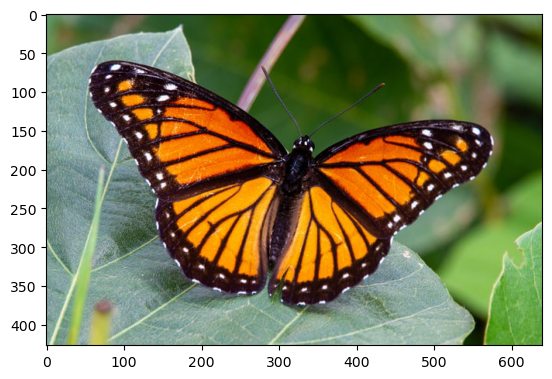

In [20]:
plt.imshow(img_matrix);

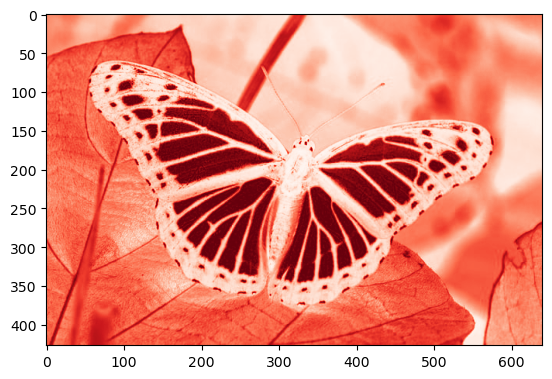

In [25]:
plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds);

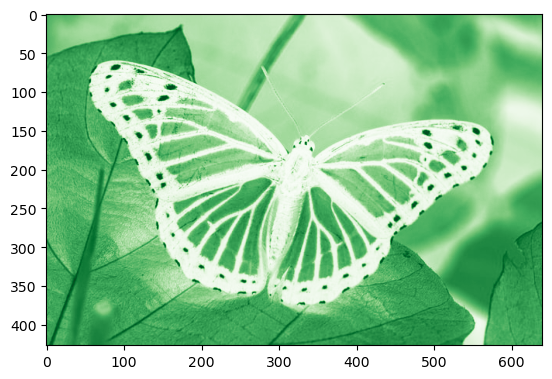

In [27]:
plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens);

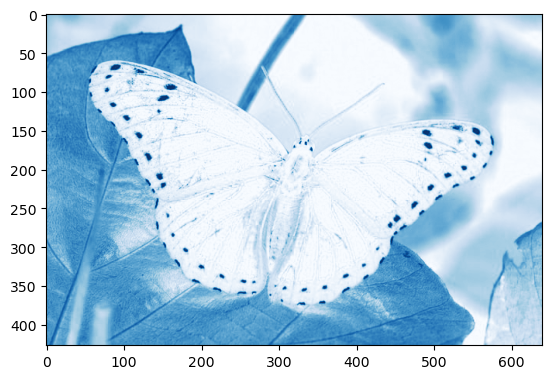

In [29]:
plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues);

In [31]:
! pip3 install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [37]:
import torch 
import torch.nn as nn
from torch.nn.functional import conv2d

In [33]:
img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 427, 640, 3])

In [34]:
img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size() #(число изображений, число каналов, высота, ширина)

torch.Size([1, 3, 427, 640])

In [35]:
sobel_hor = [[-1, -2, -1], 
             [ 0,  0,  0], 
             [ 1,  2,  1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [39]:
img_conv_hor = conv2d(img_tensor, kernel)

img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 425, 638, 1])

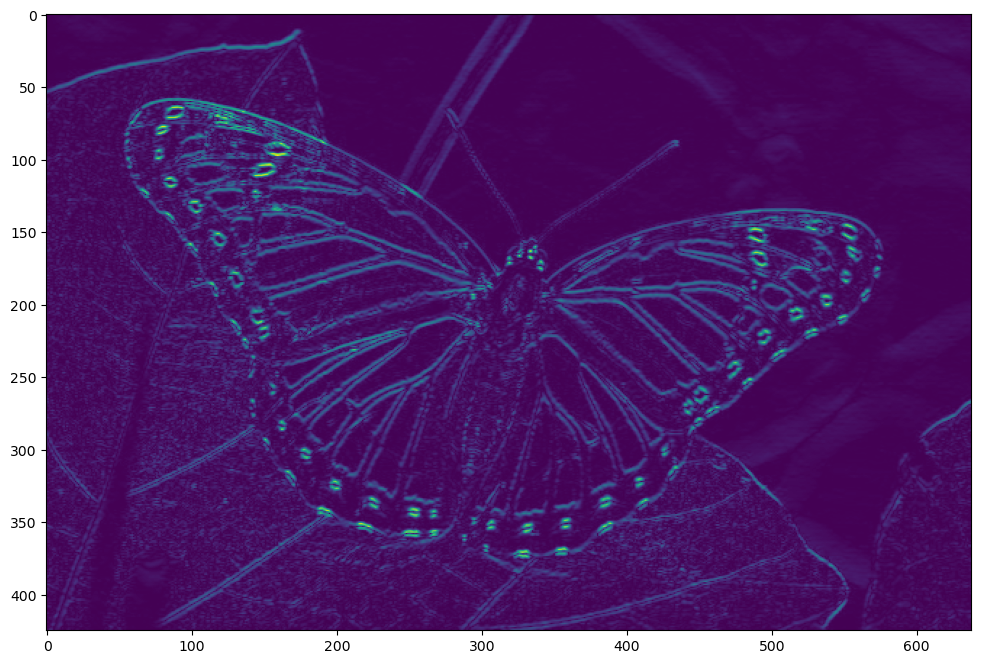

In [45]:
plt.figure(figsize=(2*7, 2*4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

In [41]:
sobel_ver = [[-1, 0, 1], 
             [-2, 0, 2], 
             [-1, 0, 1]]

# одна матрица на каждый канал картинки
kernel  = [[sobel_ver, sobel_ver, sobel_ver]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size() #(число выходных каналов, число входных каналов, высота, ширина)

torch.Size([1, 3, 3, 3])

In [42]:
img_conv_ver = conv2d(img_tensor, kernel)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size() #(число изображений, высота, ширина, число каналов)

torch.Size([1, 425, 638, 1])

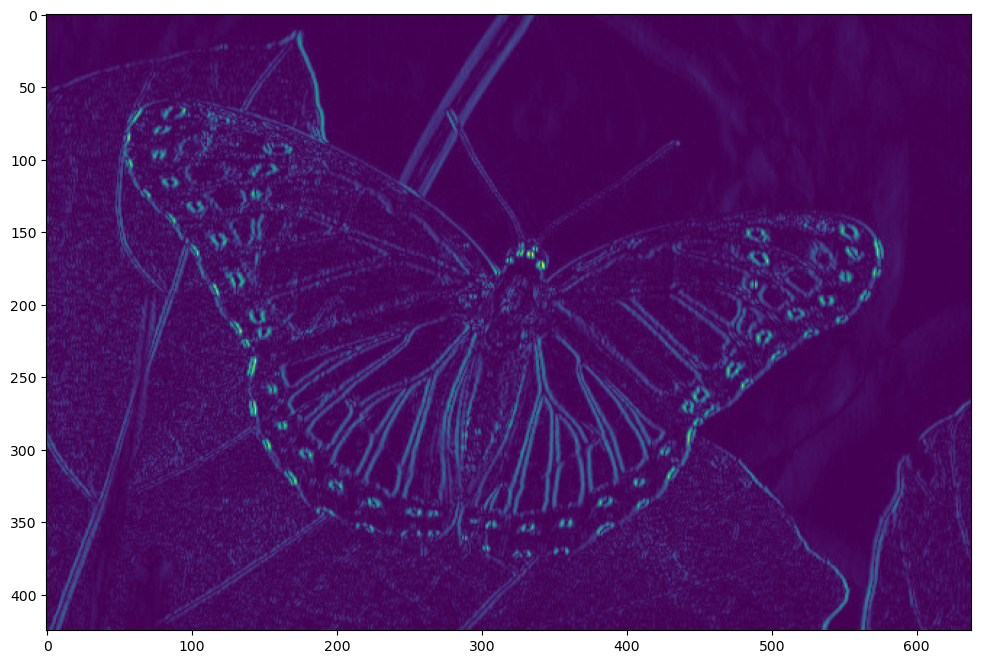

In [46]:
plt.figure(figsize=(2*7, 2*4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

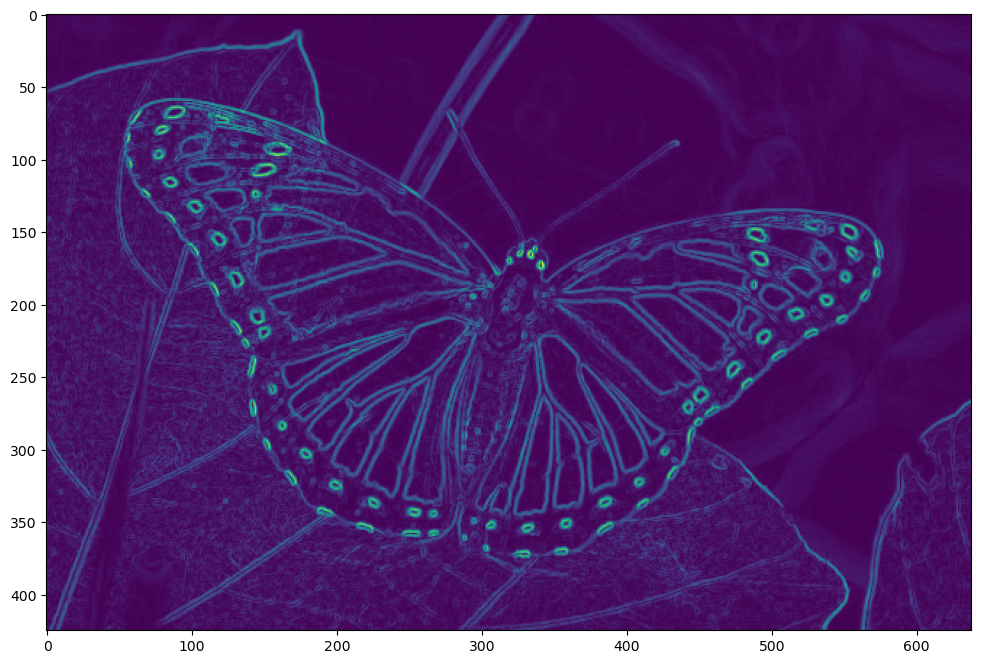

In [47]:
img_conv = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(2*7, 2*4))
plt.imshow(img_conv[0, :, :, 0])
plt.show()

## MNIST

In [52]:
import torchvision
import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.has_mps:
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(device)

mps


In [ ]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307, ), (0.3081, )),
    ]
)

mnist_train = MNIST(
    './mnist/', train=True, download=True, transform=transform,
)

mnist_val = MNIST(
    './mnist/', train=False, download=True, transform=transform,
)

train_dataloader = DataLoader(mnist_train, shuffle=True, batch_size=32)
val_dataloader = DataLoader(mnist_val, shuffle=False, batch_size=32)

100%|██████████| 9.91M/9.91M [00:14<00:00, 707kB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 215kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.07MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.71MB/s]


In [57]:
def train(model, optimizer, n_epochs=5):
    for epoch in range(n_epochs):
        for x_train, y_train in tqdm(train_dataloader):
            y_pred = model(x_train)
            loss = F.cross_entropy(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []
            
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = F.cross_entropy(y_pred, y_val)
                    
                    val_loss.append(loss.numpy())
                    val_accuracy.extend(
                        (torch.argmax(y_pred, dim=1) == y_val).numpy().tolist()
                    )
                    
            print(f' Epoch: {epoch}; loss: {np.mean(val_loss)}; accuracy: {np.mean(val_accuracy)}')
            

In [55]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

optimizer = torch.optim.SGD(
    model.parameters(), 
    lr=0.01,
)

In [58]:
train(model, optimizer)

100%|██████████| 625/625 [00:00<00:00, 1730.48it/s]


 Epoch: 0; loss: 0.20261254906654358; accuracy: 0.9422


100%|██████████| 625/625 [00:00<00:00, 1879.08it/s]


 Epoch: 2; loss: 0.12902311980724335; accuracy: 0.9605


100%|██████████| 625/625 [00:00<00:00, 1848.91it/s]

 Epoch: 4; loss: 0.09537363052368164; accuracy: 0.9714


In [62]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1, out_channels=10, kernel_size=5,
    ),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),
    nn.Flatten(),
    nn.Linear(6 * 6 * 10, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [63]:
train(model, optimizer)

100%|██████████| 625/625 [00:00<00:00, 1252.92it/s]


 Epoch: 0; loss: 0.10470198094844818; accuracy: 0.9672


100%|██████████| 625/625 [00:00<00:00, 1277.78it/s]


 Epoch: 2; loss: 0.059755731374025345; accuracy: 0.9813


100%|██████████| 625/625 [00:00<00:00, 1233.08it/s]

 Epoch: 4; loss: 0.04525548592209816; accuracy: 0.9845
